In [1]:
import numpy as np
import pandas as pd
import glob, os, re
from num2tex import num2tex
import gsd, gsd.hoomd, itertools
import freud
import shapely
import itertools

In [2]:
from scipy.spatial import distance

In [3]:
from pylab import *
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
marker_list = 'osx<>*'


In [5]:
plt.style.use(['science', 'bright'] )
#plt.style.use(['science', 'bright', 'notebook'] )
#plt.style.use('seaborn-paper')
%matplotlib inline
#inline
#%qtconsole
#sns.set_theme('paper')

In [9]:
%matplotlib

Using matplotlib backend: <object object at 0x7fdfd6efda90>


In [6]:
tgsd_fname = '/omid/ehsan/active-rods-sims/gsds/dump-dump-v4--Na500-No100000-Ro5-phi{phi}-dim2-T0-t_re5e-1-tgsd2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-id500-obstacles.gsd'
#gsd_fname = '/omid/ehsan/active-rods-sims/gsds/dump-dump-v4--Na500-No50000-Ro5-phi0.5-dim2-T0-t_re5e-1-tgsd2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-id300-obstacles.gsd'

In [6]:
snap = gsd.hoomd.open(gsd_fname, 'rb')

NameError: name 'gsd_fname' is not defined

In [6]:
pos = snap[0].particles.position
box_arr = snap[0].configuration.box
box_arr[2] = 0
print(box_arr)
r_max = box_arr[0]*0.1
r_max = 50
bins = 10000
rdf = freud.density.RDF(bins, r_max)
rdf.compute(system=snap[0], reset=True)

NameError: name 'snap' is not defined

In [105]:
plot(rdf.bin_centers, rdf.rdf)

In [134]:
r_c = 11
bin_edges = rdf.bin_edges
bin_counts = rdf.bin_counts
N_tot = np.sum(bin_counts)
np.sum(rdf.rdf[rdf.bin_centers<r_c]*np.diff(rdf.bin_edges)[0])
#area = np.sum(rdf.rdf*np.diff(bin_edges))

4.7216916

In [37]:
r_c = 20
bins = 1000
rdf_dict = dict()
L2 = dict()
phi_list = ['0.3', '0.4', '0.5', '0.6', '0.7']
for phi in phi_list:
    gsd_fname = tgsd_fname.format(phi=phi)
    print(gsd_fname)
    snap = gsd.hoomd.open(gsd_fname, 'rb')
    pos = snap[0].particles.position
    box_arr = snap[0].configuration.box
    L2[phi] = box_arr[0]**2
    #box_arr[2] = 0
    print(phi, box_arr)
    rdf_dict[phi] = freud.density.RDF(bins, r_c, normalize=True)
    rdf_dict[phi].compute(system=snap[0], reset=True)


/omid/ehsan/active-rods-sims/gsds/dump-dump-v4--Na500-No100000-Ro5-phi0.3-dim2-T0-t_re5e-1-tgsd2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-id500-obstacles.gsd
0.3 [5.1166333e+03 5.1166333e+03 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
/omid/ehsan/active-rods-sims/gsds/dump-dump-v4--Na500-No100000-Ro5-phi0.4-dim2-T0-t_re5e-1-tgsd2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-id500-obstacles.gsd
0.4 [4.431135e+03 4.431135e+03 1.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00]
/omid/ehsan/active-rods-sims/gsds/dump-dump-v4--Na500-No100000-Ro5-phi0.5-dim2-T0-t_re5e-1-tgsd2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-id500-obstacles.gsd
0.5 [3.9633274e+03 3.9633274e+03 1.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00]
/omid/ehsan/active-rods-sims/gsds/dump-dump-v4--Na500-No100000-Ro5-phi0.6-dim2-T0-t_re5e-1-tgsd2-Guniform-alpha1e2-phimax0.91-phi00.63-BG0.1-TMrandom-id500-obstacles.gsd
0.6 [3.6180063e+03 3.6180063e+03 1.0000000e+00 0.0000

In [35]:
%qtconsole

In [40]:
f = figure()
r_max = 15
data = [[]]
for phi in phi_list:
    rdf0 = rdf_dict[phi]
    int_value = rdf0.rdf[rdf0.bin_centers<=10][-1]#*np.diff(rdf0.bin_centers)[0]
    int_value2 = np.sum(rdf0.bin_counts[rdf0.bin_centers<=r_max])#*np.diff(rdf0.bin_edges)[0]
    plot(rdf0.bin_centers[rdf0.bin_centers<=r_max], rdf0.rdf[rdf0.bin_centers<=r_max], label=phi)
    data = data + [[float(phi), int_value, int_value2]]
data = np.array(data[1:])
legend(loc='best')

In [28]:
np.diff(rdf0.bin_edges)[0]
data

array([[3.00000000e-01, 2.01446198e-04, 1.04826000e+05],
       [4.00000000e-01, 2.99108147e-04, 1.55852000e+05],
       [5.00000000e-01, 3.19772480e-04, 1.66648000e+05],
       [6.00000000e-01, 4.61211684e-04, 2.40128000e+05],
       [7.00000000e-01, 6.58035242e-04, 3.40056000e+05]])

In [41]:
save = True
save = False
f = figure(figsize=(4,3))
plot(data[:, 0], data[:, 1]/data[0, 1], '-*', color='C2')
#plot(data[:, 0], data[:, 2]/data[0, 2], '-x', color='C1')
ylabel('$N^{\mathrm{de}}_{\mathrm{o}}/N^{\mathrm{de}}_{\mathrm{o},\phi=0.3}$')
xlabel('$\phi_o$')
yscale('log')
#xscale('log')

if save:
    fname = 'plots/N_o_de-phi-No100000'
    f.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    f.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

In [126]:
plot(rdf.bin_counts[rdf.bin_centers<r_c])
#plot(rdf2.bin_counts[rdf2.bin_centers<r_c])

In [147]:
#n03 = np.sum(rdf.bin_counts[rdf.bin_centers<r_c])
n05 = np.sum(rdf2.bin_counts[rdf2.bin_centers<r_c])

In [163]:
%matplotlib inline

In [152]:
(n03-n05)/

/tmp/ipykernel_126275/1492850640.py:1: RuntimeWarning: overflow encountered in ulong_scalars
  (n03-n05)/n03


382664898014967.4

## Distance between dead-ends

In [9]:
phi_list = ['0.3', '0.4', '0.5', '0.6', '0.7']

de_df = pd.DataFrame()
de_df['phi'] = phi_list
de_df.set_index('phi', inplace=True)
de_df['ave_dist'] = 0
de_df

ave_dist
phi          
0.3         0
0.4         0
0.5         0
0.6         0
0.7         0

In [554]:
phi = '0.4'
fgsd = tgsd_fname.format(phi=phi)
snap = gsd.hoomd.open(fgsd, 'rb')

[4431.135 4431.135    0.       0.       0.       0.   ]


(-100.0, 100.0)

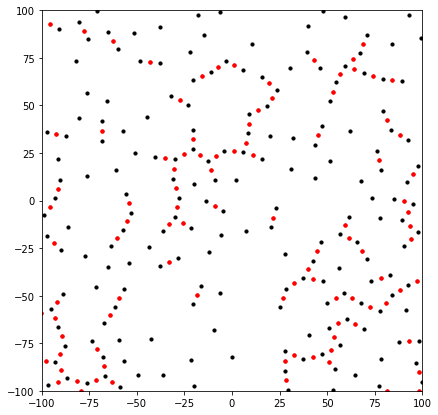

In [13]:
f = figure(figsize=(7, 7))
ax = plt.gca()
pos0 = snap[0].particles.position
box_arr = snap[0].configuration.box
box_arr[2] = 0
print(box_arr)
r_c = 11
bins = 100

L = 200 #box_arr[0]
pos = pos0[np.logical_and(np.abs(pos0[:, 0])<L*0.5, np.abs(pos0[:, 1])<L*0.5)]
box = freud.box.Box.square(L)
#box.periodic = False
#voro = freud.locality.Voronoi()
#cells = voro.compute((box, pos)).polytopes
#voro.plot(ax=ax)
ax.scatter(pos[:,0], pos[:,1], 10, 'k')
#nlist = voro.nlist
#line_data = np.asarray(
#    [[pos[i], pos[i] + box.wrap(pos[j] - pos[i])] for i, j in nlist]
#)[:, :, :2]
#line_collection = matplotlib.collections.LineCollection(line_data, alpha=0.2)
#ax.add_collection(line_collection)
ax.scatter(pos2[:,0], pos2[:,1], 10, 'r')
plt.gca().set_aspect("equal")
xlim(-L*0.5, L*0.5)
ylim(-L*0.5, L*0.5)

<AxesSubplot:title={'center':'Voronoi Diagram'}>

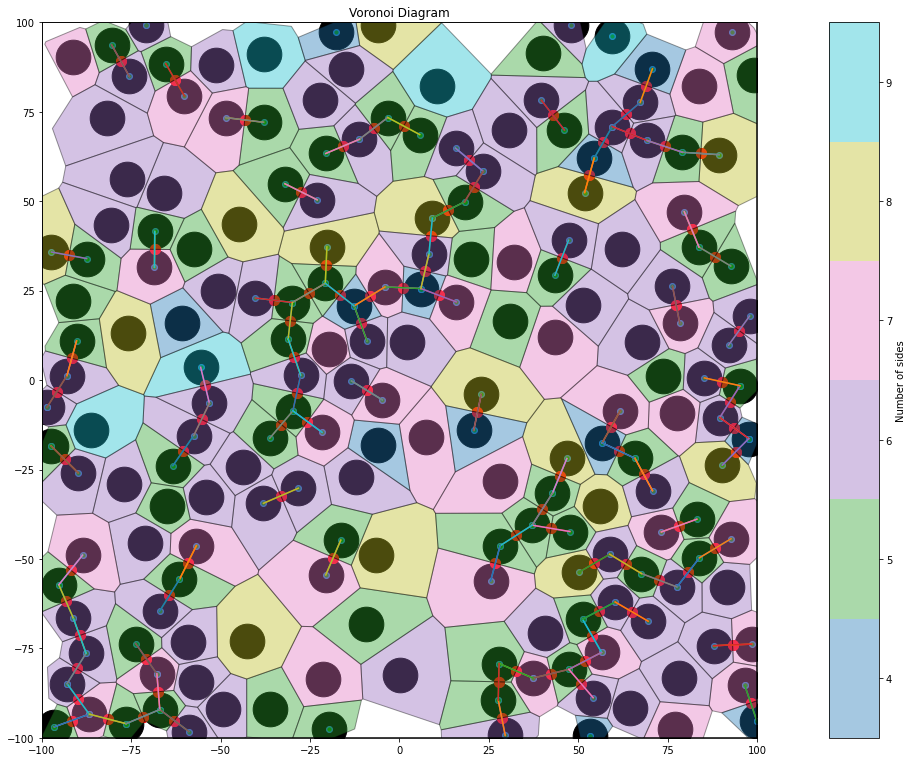

In [17]:
f = figure(figsize=(15,15))
ax = gca()
r_max = 10.7
aq = freud.locality.AABBQuery(box, pos)
nlist = aq.query(pos, {'r_max': r_max, 'exclude_ii': True, }).toNeighborList()

# Get all vectors from central particles to their neighbors
rijs = (-pos[nlist.point_indices] +
       pos[nlist.query_point_indices])
pos2 = (pos[nlist.point_indices] +
       pos[nlist.query_point_indices])
#rijs = box.wrap(rijs)
bond_length = np.linalg.norm(rijs, axis=1)
pos2 = 0.5 * pos2[bond_length<=11]
ax.scatter(pos[:,0], pos[:,1], 1200, 'k')
ax.scatter(pos2[:,0], pos2[:,1], 100, 'r')
ax.scatter(pos[nlist.point_indices][:,0], pos[nlist.point_indices][:,1])
ax.scatter(pos[nlist.query_point_indices][:,0], pos[nlist.query_point_indices][:,1], 10, 'g')
for i, r0 in enumerate(rijs):
    if bond_length[i]>11:
        continue
    plot([pos[nlist.point_indices][i, 0], pos[nlist.point_indices][i, 0]+r0[0]], 
         [pos[nlist.point_indices][i, 1], pos[nlist.point_indices][i, 1]+r0[1]])
plt.gca().set_aspect("equal")
voro = freud.locality.Voronoi()
cells = voro.compute((box, pos)).polytopes
voro.plot(ax=ax)

<AxesSubplot:title={'center':'Voronoi Diagram'}>

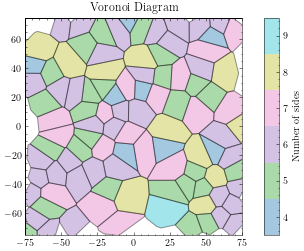

In [11]:
f = figure()
ax = gca()
voro.plot(ax=ax)

In [ ]:
voro = freud.locality.Voronoi()
cells = voro.compute((box, pos2)).polytopes
#voro.plot()

In [11]:
L

500

In [12]:
pos2[:,0].shape

(7300,)

In [13]:
N = len(pos2)
dim = 2
dist_nd_sq = np.zeros(N * (N - 1) // 2)  # to match the result of pdist
for d in range(dim):
    pos_1d = pos2[:, d][:, np.newaxis]  # shape (N, 1)
    dist_1d = distance.pdist(pos_1d)  # shape (N * (N - 1) // 2, )
    dist_1d[dist_1d > L * 0.5] -= L
    dist_nd_sq += dist_1d ** 2  # d^2 = dx^2 + dy^2 + dz^2
dist_nd = np.sqrt(dist_nd_sq)

In [14]:
dX = distance.pdist(pos2[:, 0][:, None], 'euclidean')
print(dX.max())
dX[dX>0.5*L] = L-dX[dX>0.5*L] 
dY = distance.pdist(pos2[:, 1][:, None], 'euclidean')
dY[dY>0.5*L] = L-dY[dY>0.5*L]
dR = dX**2+dY**2

498.41802978515625


0.3 1136
0.4 1714
0.5 2522
0.6 4130
0.7 7300


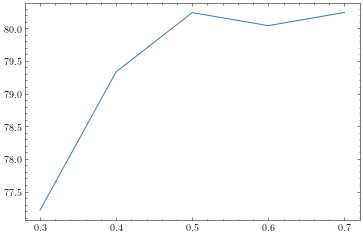

In [18]:
r_c = 11
bins = 1000

for phi in phi_list:
    snap = gsd.hoomd.open(tgsd_fname.format(phi=phi), 'rb')
    pos0 = snap[0].particles.position
    box_arr = snap[0].configuration.box
    box_arr[2] = 0
    L = 500 #box_arr[0]

    pos = pos0[np.logical_and(np.abs(pos0[:, 0])<L*0.5, np.abs(pos0[:, 1])<L*0.5)]
    box = freud.box.Box.square(L)
    r_max = 11
    aq = freud.locality.AABBQuery(box, pos)
    nlist = aq.query(pos, {'r_max': r_max, 'exclude_ii': True}).toNeighborList()

    # Get all vectors from central particles to their neighbors
    pos2 = (pos[nlist.point_indices] +
          pos[nlist.query_point_indices])
    #rijs = box.wrap(rijs)
    del snap
    del nlist
    del pos0
    del pos
    del aq
    pos2 = 0.5 * pos2
    N = len(pos2)
    print(phi, N)
    dim = 2
    #dist_nd_sq = np.zeros(N * (N - 1) // 2)  # to match the result of pdist
    #for d in range(dim):
    #    pos_1d = pos2[:, d][:, np.newaxis]  # shape (N, 1)
    #    dist_1d = distance.pdist(pos_1d)  # shape (N * (N - 1) // 2, )
    #    dist_1d[dist_1d > L * 0.5] -= L
    #    dist_nd_sq += dist_1d ** 2  # d^2 = dx^2 + dy^2 + dz^2
    #dist_nd = np.sqrt(dist_nd_sq)
    #del dist_nd_sq
    Y = distance.pdist(pos2, 'euclidean')
    
    ####
    de_df.loc[phi, 'ave_dist'] = Y[Y<L*0.25].mean()
    del Y
plot(de_df)


In [573]:
plot(de_df)
#yscale('log')

# intersection of line and circle

In [535]:
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.ops import cascaded_union
from shapely.ops import unary_union
from shapely.ops import split

p = Point(5,5)
c = p.buffer(10)
l = LineString([(-10,0), (25, 10)])
lb = l.buffer(0.0001)
i = c.intersection(l)
lc1 = split(l, c.boundary)
print(i.is_empty)
print(i.length)

False
19.935146664835177


In [537]:
lc1.geoms[1].xy
#split(l, c)

(array('d', [-4.392305680079743, 14.775815237891367]),
 array('d', [1.6021983771200734, 7.078804353683248]))

In [540]:
plt.gca().axis("equal")
plt.plot(*c.boundary.xy)
plt.plot(*l.xy)
pp = l.project(c)
#for geom in i.geoms:
#    plt.plot(*geom.coords[0], 'o', color='green')
#grid()
for i,l0 in enumerate(lc1.geoms):
    #if not(c.contains(l0)):
    print(c.intersects(l0))
    plt.plot(*l0.xy)

third argument of GEOSProject_r must be Point


False
True
False


In [10]:
from progress.bar import Bar

ModuleNotFoundError: No module named 'progress'

In [642]:
fig = plt.figure(figsize=(10,10))
plt.gca().axis("equal")

L = 150
x0 = y0 = 0

# Obstacles
pos0 = snap[0].particles.position[:, :2]
pos = pos0[np.abs(pos0[:, 0]-x0)<L]
pos = pos[np.abs(pos[:, 1]-y0)<L]
circles = [Point(p[0], p[1]).buffer(5) for p in pos]
circles_boundary = [c.boundary for c in circles]

print('#N obstacles:', len(circles_boundary))
for c in circles_boundary:
    plt.plot(*c.xy, color='black', lw=1)
merged_circles_boundary = unary_union(circles_boundary)
merged_circles = unary_union(circles)

# Random lines
rng = np.random.default_rng(None)
N = 150
ij = np.triu_indices(N,k=1)
print(len(ij[0]))
#points = rng.random((N,2))*2*L - L + np.array([[x0, y0]])
theta = rng.random(N)*np.pi*2
sincos = np.empty(shape=(N, 2))
sincos[:, 1] = np.sin(theta)
sincos[:, 0] = np.cos(theta)
rand_id = rng.choice(len(pos), N)
points = pos[rand_id] + 5*sincos
#for p in points:
#    plot(*p, 'o', color='green')

lines = []
for p1, p2 in zip(points[ij[0]], points[ij[1]]):
    lines.append(LineString([p1, p2]))
print(len(lines))
chords_length = []
chords = []
bar = Bar('Cleaning lines', max=len(lines), suffix='%(percent)d%%')
for i, l00 in enumerate(lines):
    bar.next()
    splitted_lines = l00.difference(merged_circles)
    if splitted_lines.geom_type=='LineString':
        plt.plot(*splitted_lines.xy, color='blue', lw=1)
        chords_length.append(splitted_lines.length)
        chords.append(splitted_lines)
    else:
        for i,l0 in enumerate(splitted_lines.geoms):
            plt.plot(*l0.xy, color='red', lw=1)
            chords_length.append(l0.length)
            chords.append(l0)
bar.finish()
print(len(chords))
xlim(-L, L)
ylim(-L, L)
xticks([])
yticks([])

#N obstacles: 433
11175
11175
99787


([], [])

In [644]:
fig.savefig('plots/snapshot-chord-lines-phi0.4.jpg', dpi=200, bbox_inches='tight')

In [636]:
bins=50
#hist(chords_length, bins=bins, density=Trboundaryue)
y, be = np.histogram(chords_length, bins=bins, density=True)
bc = 0.5*(be[:-1] + be[1:])
plot(bc, y, 'o')
yscale('log')
#xscale('log')

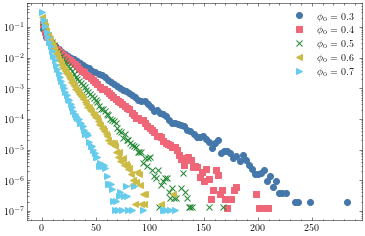

In [11]:
bins = 100
pool = dict()
y = dict()
be = dict()
bc = dict()
chord_length_means = [[]]
tfpool = '/omid/ehsan/active-rods-sims/chord-lines/all-phi{phi}.txt'
phi_list = ['0.3', '0.4', '0.5', '0.6', '0.7']
markers = itertools.cycle(marker_list)
for i, phi in enumerate(phi_list):
    m = next(markers)
    color = 'C%d'%i
    fpool = tfpool.format(phi=phi)
    if not(os.path.exists(fpool)):
        continue
    pool[phi] = np.loadtxt(fpool)
    chord_length_means.append([float(phi), np.mean(pool[phi])])
    y[phi], be[phi] = np.histogram(pool[phi], bins=bins, density=True)
    bc[phi] = 0.5*(be[phi][:-1]+be[phi][1:])
    label = '$\phi_{\mathrm{o}}=%s$'%phi
    nozero = y[phi]>0
    plt.plot(bc[phi][nozero], y[phi][nozero], '%s'%m, color=color, label=label)
yscale('log')
legend(loc='best')
chord_length_means = np.array(chord_length_means[1:])

In [12]:
chord_length_means

array([[ 0.3       , 16.24150605],
       [ 0.4       , 10.94098857],
       [ 0.5       ,  7.37385662],
       [ 0.6       ,  5.11236047],
       [ 0.7       ,  3.16464025]])

In [13]:
from scipy.optimize import curve_fit
import matplotlib

In [18]:
chord_length_means = np.array([[ 0.3       , 16.24150605],
       [ 0.4       , 10.94098857],
       [ 0.5       ,  7.37385662],
       [ 0.6       ,  5.11236047],
       [ 0.7       ,  3.16464025]])
mean_ncolls = np.array([[0.3       , 4.50276885],
       [0.4       , 3.78459922],
       [0.5       , 3.5080391 ],
       [0.6       , 2.86779283],
       [0.7       , 2.16451506]])
#############
mean_delta_tre_d = {'sigmoid': array([[ 0.3       , 91.07334311],
        [ 0.4       , 47.91996723],
        [ 0.5       , 25.64705253],
        [ 0.6       , 17.97228314],
        [ 0.7       , 13.4165968 ]])}

In [164]:
import cmasher as cmr
colors = cmr.take_cmap_colors('Paired', None, cmap_range=(0, 1), return_fmt='hex')

In [165]:
colors

['#A6CEE3',
 '#1F78B4',
 '#B2DF8A',
 '#33A02C',
 '#FB9A99',
 '#E31A1C',
 '#FDBF6F',
 '#FF7F00',
 '#CAB2D6',
 '#6A3D9A',
 '#FFFF99',
 '#B15928']

In [169]:
save = True
#save = False
fig = plt.figure(figsize=(3,3))

markers = itertools.cycle(marker_list)
exp_fit = [[]]
for i, phi in enumerate(phi_list):
    m = next(markers)
    color = 'C%d'%i
    #color = colors[i]
    label = '$\phi_{\mathrm{o}}=%s$'%phi
    nozero = y[phi]>0
    plt.plot(bc[phi][nozero], y[phi][nozero], '%s'%m, color=color)#, label=label)
    if phi in ['0.3', '0.4']:
        start = -70
        end = -50
    elif phi in ['0.5']:
        start = -50
        end = -40
    elif phi in ['0.6']:
        start = -50
        end = -40
    elif phi in ['0.7']:
        start = -45
        end = -30


    x0 = bc[phi][nozero][start:end]
    y0 = y[phi][nozero][start:end]
    fit_data = curve_fit(lambda t, a, b: a*np.exp(b*t), x0, y0, p0=(1, -0.01))
    print(phi, fit_data)
    x00 = np.linspace(20, bc[phi][-1],100)
    y00 = fit_data[0][0]*np.exp(fit_data[0][1]*x00)
    ids = y00>1e-7
    if phi==phi_list[-1]:
        plot(x00[ids], y00[ids], color='black', ls='-', lw=1,
            label='$\\alpha \exp(-\\beta \ell)$')
    else:
        plot(x00[ids], y00[ids], color='black', ls='-', lw=1)
    exp_fit = exp_fit + [[float(phi), fit_data[0][0], fit_data[0][1]]]
exp_fit = np.array(exp_fit[1:])
    
yscale('log')
xlim(-10, 400)
ylim(1e-7, 2e-1)

#legend(loc='best')
#legend(loc='upper right', frameon=False, ncol=2)

xlabel('Chord-length')
ylabel('PDF')
plt.text(  # position text relative to Axes
    .1, .95, '$(b)$', fontsize=16,
    ha='left', va='top',
    transform=gca().transAxes)
###############
#ax3 = fig.add_axes([0.63, 0.38, 0.25, 0.27])
ax3 = fig.add_axes([0.49, 0.45, 0.39, 0.4])
#ax3.plot(exp_fit[:,0], exp_fit[:, 2]/exp_fit[0, 2], '--D', color='black')
label = '$\\langle \\tau_{\mathrm{re}}^{w}\\rangle$'
label = 'Sim.'
ax3.plot(mean_delta_tre_d['sigmoid'][:, 0], mean_delta_tre_d['sigmoid'][:, 1], '-D', color=colors[3],
     label=label, alpha=1) #label='G: sigmoid')
#ax3.plot(mean_delta_tre_d['sigmoid'][:, 0], mean_delta_tre_d['sigmoid'][:, 1], '-', color='green')

tau2 = (mean_ncolls[:, 1] + 1)*chord_length_means[:, 1]
#label2 = '$(n_{\mathrm{coll}} + 1)\\frac{\\langle l_{\mathrm{chord}}\\rangle}{v_{\mathrm{a}}}$'
label2 = 'Est.'
ax3.plot(mean_ncolls[:, 0], tau2, '--*', color=colors[5], label=label2, alpha=1.)

ax3.set_xlabel('$\phi_{\mathrm{o}}$', fontsize=14)
ax3.set_ylabel('$\\langle \\tau_{\mathrm{re}}^{\mathrm{w}}\\rangle$', fontsize=14)
#ax3.set_ylabel('Time')
#ax3.yaxis.tick_right()
#ax3.xaxis.tick_top()
#xscale('log')
#ax3.set_yscale('log')
#ax3.set_yticks([1, 2, 3])
ax3.set_ylim(0., 100)
ax3.set_yticks([25, 50, 75])
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax3.get_yaxis().get_major_formatter().labelOnlyBase = False
ax3.legend(loc='upper right')#(fontsize=14)
if save:
    fname = 'plots/hist-chord-lengths-diff-phi-fit-insetv2'
    fig.savefig(fname+'.svg', dpi=200, bbox_inches='tight')
    fig.savefig(fname+'.pdf', dpi=200, bbox_inches='tight')

0.3 (array([ 0.0399977 , -0.04990926]), array([[ 1.36384305e-06, -6.63362787e-07],
       [-6.63362787e-07,  3.34247642e-07]]))
0.4 (array([ 0.04889512, -0.06903757]), array([[ 9.84484194e-06, -4.01383114e-06],
       [-4.01383114e-06,  1.66805029e-06]]))
0.5 (array([ 0.05364037, -0.09821584]), array([[ 1.91892844e-04, -5.92023489e-05],
       [-5.92023489e-05,  1.83382693e-05]]))
0.6 (array([ 0.04704965, -0.12231452]), array([[ 6.54449175e-05, -3.35221040e-05],
       [-3.35221040e-05,  1.72536081e-05]]))
0.7 (array([ 0.01990776, -0.1560367 ]), array([[ 2.91622423e-05, -3.96710296e-05],
       [-3.96710296e-05,  5.43315523e-05]]))


In [73]:
import pickle
with f as open('tre_waiting_dist.pkl', 'rb'):
    bc_tr
pickle.load(

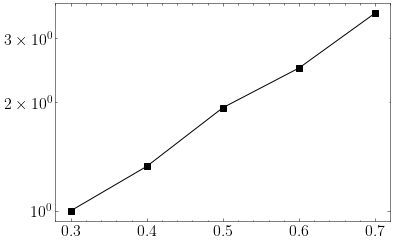

In [658]:
fig = figure()
plot(exp_fit[:,0], exp_fit[:, 2]/exp_fit[0, 2], '-s', color='black')
yscale('log')

In [208]:
len(points)
len(pos)
dist = distance.cdist(points, pos[:,:2])

In [339]:
for phi in phi_list:
    LL = np.pi*2500*25/float(phi)
    print(phi, LL**0.5, 0.5*LL**0.5)

0.3 809.010796898208 404.505398449104
0.4 700.6239020497411 350.31195102487055
0.5 626.6570686577501 313.32853432887504
0.6 572.0570205398556 286.0285102699278
0.7 529.6218878317976 264.8109439158988


In [15]:
%matplotlib inline

## Intersection of two circles

In [4]:
def intersection_A(r1, r2, d, dim=2):
    if d>=(r1+r2):
        return 0
    if d<=(r1-r2):
        if dim==2:
            return np.pi*r2**2
        else:
            return (4./3.)*np.pi*r2**3
            
    if dim==2:
        d1 = (r1**2 - r2**2 + d**2)/(2*d)
        d2 = d - d1
        res1 = r1**2 * np.arccos(d1/r1) - d1*np.sqrt(r1**2 - d1**2)
        res2 = r2**2 * np.arccos(d2/r2) - d2*np.sqrt(r2**2 - d2**2)
        return res1 + res2
    else:
        res1 = np.pi/(12*d)
        res2 = (r1 + r2 - d)**2
        res3 = (d**2 + 2*d*(r1 + r2) - 3*(r1 - r2)**2)
        return res1*res2*res3


In [30]:
Ro = 2.5
phi_max = 0.75
A0 = np.pi*2.5**2
#A0 = (4./3.)*np.pi*2.5**3
2*intersection_A(Ro, 2.5, 0.5+Ro, dim=2)/A0

0.569513959730588

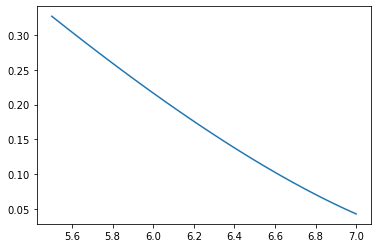

In [53]:
r = np.linspace(5.5, 7, 100)
phi_l = np.array([intersection_A(2.5, 5, r0)/A0 for r0 in r])
plot(r, phi_l)

In [63]:
a =['a', 'b', 'c']

In [64]:
a.index('b')

1

In [17]:
a = np.ones((3, 5))

In [18]:
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [19]:
a[:, :] = 2

In [20]:
a

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])